In [1]:
# Install gensim in Colab
!pip install gensim


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
import zipfile

# Paths on Google Drive
csv_path = '/content/drive/MyDrive/Indian_judgements/reduced_judgements_clean.csv'
pdf_zip_path = '/content/drive/MyDrive/Indian_judgements/reduced_pdfs.zip'

# Extract ZIP to a folder in Colab
extracted_pdf_dir = '/content/reduced_pdfs'
os.makedirs(extracted_pdf_dir, exist_ok=True)

with zipfile.ZipFile(pdf_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_pdf_dir)

print("PDFs extracted to:", extracted_pdf_dir)


PDFs extracted to: /content/reduced_pdfs


In [5]:
import pandas as pd

# Load CSV
df = pd.read_csv(csv_path)

# Check columns
print("Columns in CSV:", list(df.columns))

# Preview first 5 rows
print("\nFirst few rows:")
print(df.head())


Columns in CSV: ['diary_no', 'case_no', 'judgment_dates', 'pdf_exists', 'pdf_path']

First few rows:
     diary_no                          case_no judgment_dates  pdf_exists  \
0  80384-1991                              - 0     10-03-1992        True   
1  18732-1998  Crl.A. No.-001258-001263 - 1999     26-11-1999        True   
2   7011-2000    C.A. No.-002551-002551 - 2001     20-02-2008        True   
3  25859-2004    C.A. No.-000584-000584 - 2008     22-01-2008        True   
4   9232-2003    C.A. No.-004227-004227 - 2003     03-09-2009        True   

                                            pdf_path  
0  /content/indian_judgments/pdfs/80384-1991___jo...  
1  /content/indian_judgments/pdfs/18732-1998___jo...  
2  /content/indian_judgments/pdfs/7011-2000___jon...  
3  /content/indian_judgments/pdfs/25859-2004___jo...  
4  /content/indian_judgments/pdfs/9232-2003___jon...  


In [6]:
# ===============================
# STEP 1: Setup & Imports
# ===============================
!pip install PyMuPDF tqdm

import os
import fitz  # PyMuPDF
from tqdm import tqdm
import pandas as pd

# ===============================
# STEP 2: Paths
# ===============================
csv_path = '/content/drive/MyDrive/Indian_judgements/reduced_judgements_clean.csv'
pdf_dir = '/content/reduced_pdfs'  # extracted ZIP folder

# ===============================
# STEP 3: Load CSV
# ===============================
df = pd.read_csv(csv_path)
print("✅ CSV loaded successfully!")
print("Columns in CSV:", list(df.columns))
print("\nPreview:")
print(df.head())

# Ensure the `pdf_path` column points to actual files in extracted folder
# (if your old paths were from /content/reduced_pdfs in previous run)
df['pdf_path'] = df['pdf_path'].apply(lambda x: os.path.join(pdf_dir, os.path.basename(str(x))))

# ===============================
# STEP 4: Filter & Extract Text from PDFs
# ===============================
df['judgements_text'] = ''

# Filter to only existing & non-empty PDFs
df = df[df['pdf_path'].apply(lambda x: os.path.exists(x) and os.path.getsize(x) > 0)].reset_index(drop=True)
print("📄 Total valid PDFs found:", len(df))

# Extract text from PDFs
for i, row in tqdm(df.iterrows(), total=len(df), desc="Extracting text"):
    pdf_path = row['pdf_path']
    text = ''
    try:
        with fitz.open(pdf_path) as doc:
            for page in doc:
                page_text = page.get_text()
                if page_text:
                    text += page_text + '\n'
    except Exception as e:
        print(f"❌ Error reading {pdf_path}: {e}")
    df.at[i, 'judgements_text'] = text

print("\n✅ Text extraction done for", len(df), "PDFs")

# ===============================
# STEP 5: Save extracted data
# ===============================
text_csv_path = '/content/judgements_with_text.csv'
text_parquet_path = '/content/judgements_with_text.parquet'

df.to_csv(text_csv_path, index=False)
df.to_parquet(text_parquet_path, index=False)

print(f"📁 Saved extracted data to:\nCSV: {text_csv_path}\nParquet: {text_parquet_path}")


✅ CSV loaded successfully!
Columns in CSV: ['diary_no', 'case_no', 'judgment_dates', 'pdf_exists', 'pdf_path']

Preview:
     diary_no                          case_no judgment_dates  pdf_exists  \
0  80384-1991                              - 0     10-03-1992        True   
1  18732-1998  Crl.A. No.-001258-001263 - 1999     26-11-1999        True   
2   7011-2000    C.A. No.-002551-002551 - 2001     20-02-2008        True   
3  25859-2004    C.A. No.-000584-000584 - 2008     22-01-2008        True   
4   9232-2003    C.A. No.-004227-004227 - 2003     03-09-2009        True   

                                            pdf_path  
0  /content/indian_judgments/pdfs/80384-1991___jo...  
1  /content/indian_judgments/pdfs/18732-1998___jo...  
2  /content/indian_judgments/pdfs/7011-2000___jon...  
3  /content/indian_judgments/pdfs/25859-2004___jo...  
4  /content/indian_judgments/pdfs/9232-2003___jon...  
📄 Total valid PDFs found: 1879


Extracting text: 100%|██████████| 1879/1879 [01:34<00:00, 19.88it/s]



✅ Text extraction done for 1879 PDFs
📁 Saved extracted data to:
CSV: /content/judgements_with_text.csv
Parquet: /content/judgements_with_text.parquet


In [7]:
# Save extracted data directly to Google Drive
text_csv_path = '/content/drive/MyDrive/Indian_judgements/judgements_with_text.csv'
text_parquet_path = '/content/drive/MyDrive/Indian_judgements/judgements_with_text.parquet'

df.to_csv(text_csv_path, index=False)
df.to_parquet(text_parquet_path, index=False)

print(f"✅ Saved to Google Drive:\n{text_csv_path}\n{text_parquet_path}")


✅ Saved to Google Drive:
/content/drive/MyDrive/Indian_judgements/judgements_with_text.csv
/content/drive/MyDrive/Indian_judgements/judgements_with_text.parquet


In [18]:
from google.colab import files
files.download('/content/judgements_with_text.csv')
files.download('/content/judgements_with_text.parquet')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
!pip install PyMuPDF tqdm gensim pyLDAvis

import os
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm
from gensim import corpora
from gensim.models import LdaModel
import numpy as np

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize stopwords with English + legal words + modals
stop_words = set(stopwords.words('english'))
legal_stopwords = {
    'petitioner', 'respondent', 'appellant', 'defendant', 'plaintiff', 'accused',
    'party', 'parties', 'counsel', 'advocate', 'attorney', 'prosecutor', 'applicant',
    'court', 'bench', 'judgment', 'order', 'proceedings', 'hearing', 'case',
    'matter', 'petition', 'claim', 'verdict', 'decision', 'act', 'section', 'clause',
    'filed', 'plea', 'petitioners', 'respondents', 'submitted', 'allowed',
    'dismissed', 'granted', 'rejected', 'challenged', 'reviewed', 'appeal',
    'law', 'rights', 'regulation', 'rule', 'statute', 'provision', 'authority',
    'legal', 'liable', 'responsible', 'application', 'objection', 'record',
    'shall', 'may', 'would', 'could', 'should', 'must', 'might'
}
stop_words.update(legal_stopwords)

lemmatizer = WordNetLemmatizer()
CHUNK_WORDS = 400
OVERLAP = 50

# Function to preprocess text
def preprocess_text(text):
    if not isinstance(text, str):
        return ""

    # Replace hyphens inside words (names-che -> names che)
    text = re.sub(r'(\w)-(\w)', r'\1 \2', text)

    # Remove line breaks & extra spaces
    text = re.sub(r'\n+', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove URLs, numbers, punctuation
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize
    tokens = text.split()

    # Remove capitalized words (likely proper nouns)
    tokens = [w for w in tokens if not w[0].isupper()]

    # Lowercase, remove stopwords, lemmatize, remove short words
    tokens = [
        lemmatizer.lemmatize(w.lower())
        for w in tokens
        if w.lower() not in stop_words and len(w) > 2
    ]

    # Keep only English words (a-z letters)
    tokens = [w for w in tokens if re.fullmatch(r'[a-z]+', w)]

    return ' '.join(tokens)

# Apply preprocessing
df['processed_text'] = df['judgements_text'].apply(preprocess_text)

# Function to create overlapping chunks
def chunk_text_sliding_words(text, chunk_size=CHUNK_WORDS, overlap=OVERLAP):
    if not isinstance(text, str) or len(text.strip()) == 0:
        return []

    words = text.split()
    if len(words) <= chunk_size:
        return [" ".join(words)]

    chunks = []
    start = 0
    while start < len(words):
        end = min(start + chunk_size, len(words))
        chunks.append(" ".join(words[start:end]))
        if end == len(words):
            break
        start += (chunk_size - overlap)
    return chunks

# Apply chunking
df['text_chunks'] = df['processed_text'].apply(chunk_text_sliding_words)

# Explode chunks into separate rows
df_chunks = df.explode('text_chunks').reset_index(drop=True)
df_chunks = df_chunks[['diary_no', 'text_chunks']]

# Remove empty or NaN chunks
df_chunks = df_chunks[df_chunks['text_chunks'].apply(lambda x: isinstance(x, str) and len(x.strip()) > 0)].reset_index(drop=True)

print("\n✅ Preprocessing and chunking done!")

# Preview first 2 judgments and their chunks
first_two_diary_nos = df_chunks['diary_no'].unique()[:2]

for diary_no in first_two_diary_nos:
    print(f"\n=== Chunks for Judgment {diary_no} ===\n")

    chunks = df_chunks[df_chunks['diary_no'] == diary_no]['text_chunks'].tolist()

    for i, chunk in enumerate(chunks, 1):
        print(f"--- Chunk {i} ({len(chunk.split())} words) ---")
        print(chunk[:500] + ("..." if len(chunk) > 500 else ""))
        print()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



✅ Preprocessing and chunking done!

=== Chunks for Judgment 80384-1991 ===

--- Chunk 1 (400 words) ---
qualification exercise jurisdiction ground incumbent fulfill qualification required dated appointed procedure officer administer justice power analogous judicial hold judicial office judiciary justice assume jurisdiction judicial side probe purely administrative nature exclusively within purview serviceinterpretation letter dated addressed recommended name appointment bio data enclosed said letter indicated passing joined worked various post appointed worked also worked certain bio data describe...

--- Chunk 2 (400 words) ---
eligible appointed scheme clear independence judiciary part basic structure achieve objective separation judiciary executive framer meant judicial office exist independently duty part duty conferred person whether trained administration justice enshrined give mandate take step separate judiciary executive mean separate judicial service free executive control p

In [15]:
from gensim import corpora
from gensim.models import LdaModel
from gensim.models import Phrases
from gensim.models.phrases import Phraser
import numpy as np

# Keep only non-empty string chunks
df_chunks = df_chunks[df_chunks['text_chunks'].apply(lambda x: isinstance(x, str) and len(x.strip()) > 0)].reset_index(drop=True)

# Tokenize chunks
tokenized_texts = [chunk.split() for chunk in df_chunks['text_chunks']]

# Create bigrams (e.g., "service law", "tax liability") for more meaningful legal topics
bigram = Phrases(tokenized_texts, min_count=5, threshold=10)  # adjust threshold for phrase detection
bigram_mod = Phraser(bigram)
texts = [bigram_mod[doc] for doc in tokenized_texts]

# Create dictionary
dictionary = corpora.Dictionary(texts)

# Filter extremes: remove rare (<5 docs) and very common (>40% of docs) words
dictionary.filter_extremes(no_below=5, no_above=0.4)

# Convert texts to bag-of-words corpus
corpus = [dictionary.doc2bow(text) for text in texts]

# Train LDA model
NUM_TOPICS = 7
lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=NUM_TOPICS,
    random_state=42,
    passes=30,      # more passes for better convergence
    chunksize=200,  # larger chunksize for efficiency
    alpha='auto',
    eta='auto'
)

# Print top words for each topic
for i, topic in lda_model.print_topics(num_words=15):
    print(f"--- Topic {i} ---")
    print(topic)
    print()

# Get topic distribution for each chunk
def get_topic_dist(bow):
    return [prob for _, prob in lda_model.get_document_topics(bow, minimum_probability=0)]

df_chunks['topic_dist'] = [get_topic_dist(bow) for bow in corpus]

# Aggregate topic distributions per judgment
agg_topic = df_chunks.groupby('diary_no')['topic_dist'].apply(lambda x: np.mean(np.vstack(x), axis=0))
df_judgment_topics = pd.DataFrame(agg_topic.tolist(), index=agg_topic.index, columns=range(NUM_TOPICS))
df_judgment_topics.reset_index(inplace=True)

# Normalize topic distributions
df_judgment_topics.iloc[:, 1:] = df_judgment_topics.iloc[:, 1:].div(df_judgment_topics.iloc[:, 1:].sum(axis=1), axis=0)

print("\nAggregated topic distributions per judgment:")
print(df_judgment_topics.head())


--- Topic 0 ---
0.017*"evidence" + 0.010*"deceased" + 0.009*"witness" + 0.008*"offence" + 0.008*"trial" + 0.007*"prosecution" + 0.007*"report" + 0.007*"stated" + 0.006*"found" + 0.005*"complaint" + 0.005*"circumstance" + 0.005*"statement" + 0.004*"present" + 0.004*"charge" + 0.004*"alleged"

--- Topic 1 ---
0.013*"land" + 0.013*"property" + 0.011*"dated" + 0.007*"suit" + 0.006*"right" + 0.005*"possession" + 0.005*"passed" + 0.005*"notice" + 0.005*"first" + 0.004*"date" + 0.004*"ground" + 0.004*"appellant" + 0.004*"taken" + 0.004*"issue" + 0.004*"favour"

--- Topic 2 ---
0.023*"service" + 0.019*"employee" + 0.016*"post" + 0.014*"year" + 0.011*"dated" + 0.011*"appointment" + 0.008*"period" + 0.008*"workman" + 0.007*"officer" + 0.007*"date" + 0.006*"appointed" + 0.006*"appellant" + 0.005*"work" + 0.005*"issued" + 0.005*"scheme"

--- Topic 3 ---
0.013*"amount" + 0.011*"contract" + 0.011*"company" + 0.010*"assessee" + 0.009*"agreement" + 0.008*"payment" + 0.008*"tax" + 0.008*"respect" + 0.0

In [26]:
# Mapping 7 topics to 5 law categories
topic_to_law = {
    0: 'Criminal Law',
    1: 'Civil Law',
    2: 'Administrative/Service Law',
    3: 'Tax/Corporate Law',
    4: 'Constitutional Law',
    5: 'Administrative/Service Law',
    6: 'Constitutional Law'
}

# Aggregate probabilities per law category
law_probs = []
for i, row in df_judgment_topics.iterrows():
    # Sum probabilities of topics that map to the same law category
    law_sum = {}
    for t in range(7):
        law = topic_to_law[t]
        law_sum[law] = law_sum.get(law, 0) + row[t]
    law_probs.append(law_sum)

# Convert to DataFrame
df_law_probs = pd.DataFrame(law_probs)

# Assign law category with highest probability
df_judgment_topics['law_category'] = df_law_probs.idxmax(axis=1)

# Keep diary_no and law_category
df_final = df_judgment_topics[['diary_no', 'law_category']].copy()

# Preview
print(df_final.head())

# Save
df_final.to_csv('/content/judgment_law_category_finetuned.csv', index=False)
# Download the CSV
files.download('/content/judgment_law_category_finetuned.csv')


  diary_no                law_category
0       -0  Administrative/Service Law
1    -1428  Administrative/Service Law
2   1-1148                   Civil Law
3   1-1918           Tax/Corporate Law
4   1-9098  Administrative/Service Law


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
# df_judgment_topics has diary_no + topic distributions
df_judgment_topics.to_csv('/content/lda_topic_matrix.csv', index=False)


In [29]:
from gensim.models import CoherenceModel


# Compute coherence scores
coherence_cv = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v').get_coherence()
coherence_umass = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='u_mass').get_coherence()

print(f"C_v coherence (preferred, 0-1): {coherence_cv:.3f}")
print(f"UMass coherence (higher better, often negative): {coherence_umass:.3f}")


C_v coherence (preferred, 0-1): 0.439
UMass coherence (higher better, often negative): -2.171


In [32]:
# === Save LDA outputs (chunk-level and document-level) ===

import numpy as np
import pandas as pd
import joblib
import os

save_dir = '/content/drive/MyDrive/Indian_judgements/lda_outputs'
os.makedirs(save_dir, exist_ok=True)

# --- Step 1: Build per-chunk topic vectors ---
def get_topic_vector(bow):
    dist = lda_model.get_document_topics(bow, minimum_probability=0)
    vec = np.array([prob for _, prob in sorted(dist, key=lambda x: x[0])])
    if vec.sum() > 0:
        vec = vec / vec.sum()
    return vec

topic_vectors = np.vstack([get_topic_vector(b) for b in corpus])
lda_chunk_df = pd.DataFrame(topic_vectors, columns=[f'topic_{i}' for i in range(lda_model.num_topics)])

# Attach chunk metadata (diary_no)
if 'df_chunks' in locals() and 'diary_no' in df_chunks.columns:
    lda_chunk_df['diary_no'] = df_chunks['diary_no'].values[:len(lda_chunk_df)]
else:
    lda_chunk_df['diary_no'] = range(len(lda_chunk_df))
    print("⚠️ 'df_chunks' not found, using numeric IDs instead.")

print(f"✅ LDA chunk-level topic vectors created: {lda_chunk_df.shape}")

# --- Step 2: Aggregate to document level ---
lda_doc_topic_df = lda_chunk_df.groupby('diary_no').mean().reset_index()
print(f"✅ LDA document-level topic vectors created: {lda_doc_topic_df.shape}")

# --- Step 3: Save everything ---
lda_chunk_df.to_parquet(os.path.join(save_dir, 'lda_chunk_topic_df.parquet'), index=False)
lda_doc_topic_df.to_parquet(os.path.join(save_dir, 'lda_doc_topic_df.parquet'), index=False)

lda_model.save(os.path.join(save_dir, 'lda_model.model'))
dictionary.save(os.path.join(save_dir, 'lda_dictionary.dict'))
joblib.dump(corpus, os.path.join(save_dir, 'lda_corpus.joblib'))

# --- Step 4: Optional - save top words per topic ---
topic_words = {
    f"topic_{i}": [w for w, _ in lda_model.show_topic(i, topn=15)]
    for i in range(lda_model.num_topics)
}
pd.DataFrame.from_dict(topic_words, orient='index').to_csv(
    os.path.join(save_dir, 'lda_topic_keywords.csv')
)

print("✅ All LDA outputs saved to:", save_dir)
print(lda_doc_topic_df.head())


✅ LDA chunk-level topic vectors created: (8120, 8)
✅ LDA document-level topic vectors created: (1805, 8)
✅ All LDA outputs saved to: /content/drive/MyDrive/Indian_judgements/lda_outputs
  diary_no   topic_0   topic_1   topic_2   topic_3   topic_4   topic_5  \
0       -0  0.031678  0.003951  0.467515  0.001511  0.003015  0.489926   
1    -1428  0.007128  0.082721  0.434942  0.071955  0.337801  0.000553   
2   1-1148  0.012994  0.788397  0.001130  0.077209  0.093337  0.003071   
3   1-1918  0.138389  0.086864  0.242419  0.360083  0.116539  0.001430   
4   1-9098  0.002445  0.158101  0.596569  0.021466  0.117864  0.000494   

    topic_6  
0  0.002403  
1  0.064901  
2  0.023862  
3  0.054275  
4  0.103061  


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

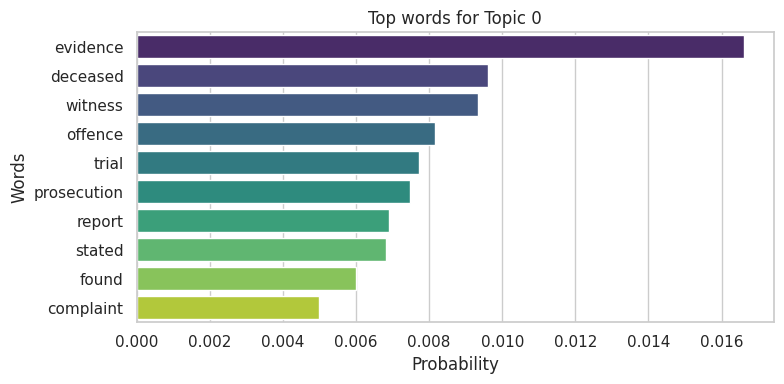

/tmp/ipython-input-216605348.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=probs, y=words, palette='viridis')


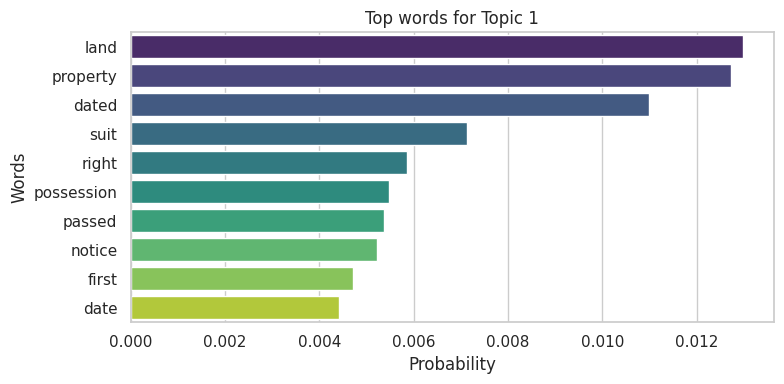

/tmp/ipython-input-216605348.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=probs, y=words, palette='viridis')


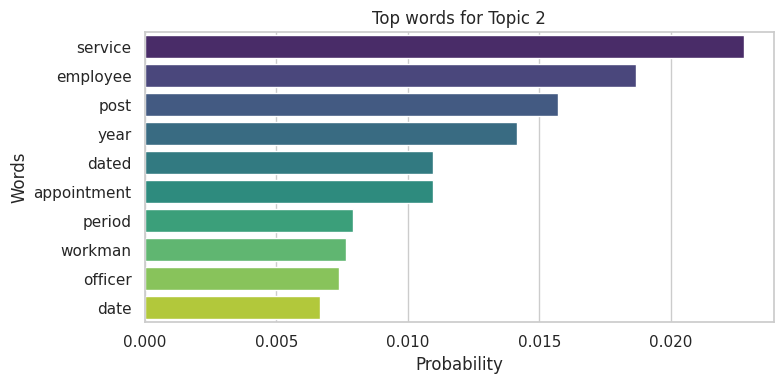

/tmp/ipython-input-216605348.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=probs, y=words, palette='viridis')


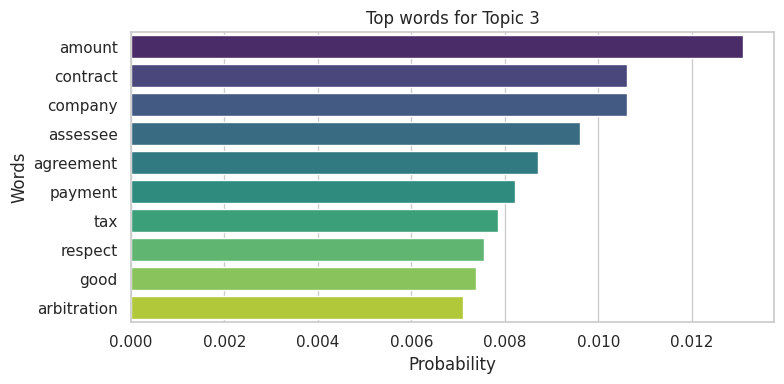

/tmp/ipython-input-216605348.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=probs, y=words, palette='viridis')


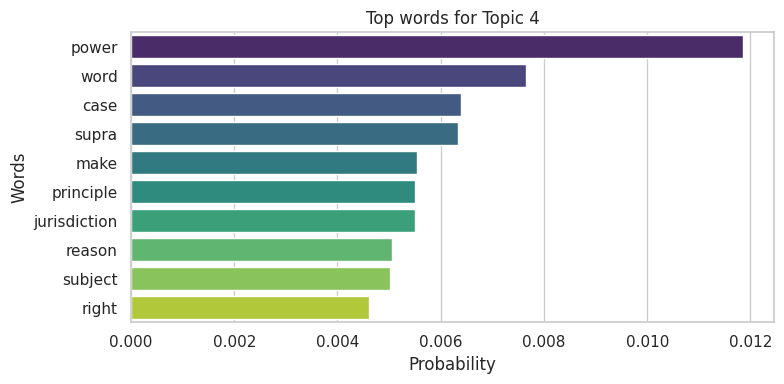

/tmp/ipython-input-216605348.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=probs, y=words, palette='viridis')


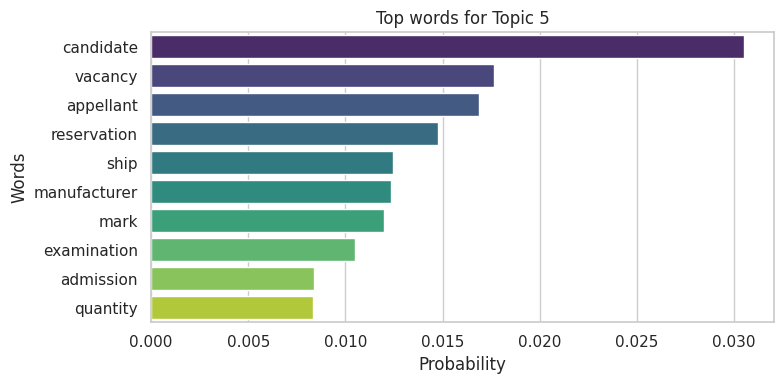

/tmp/ipython-input-216605348.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=probs, y=words, palette='viridis')


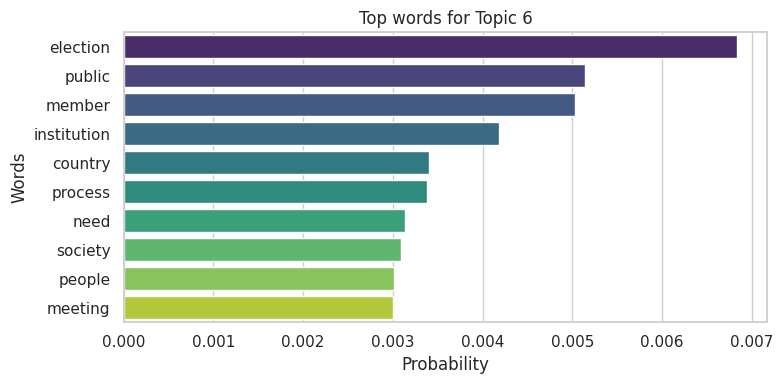

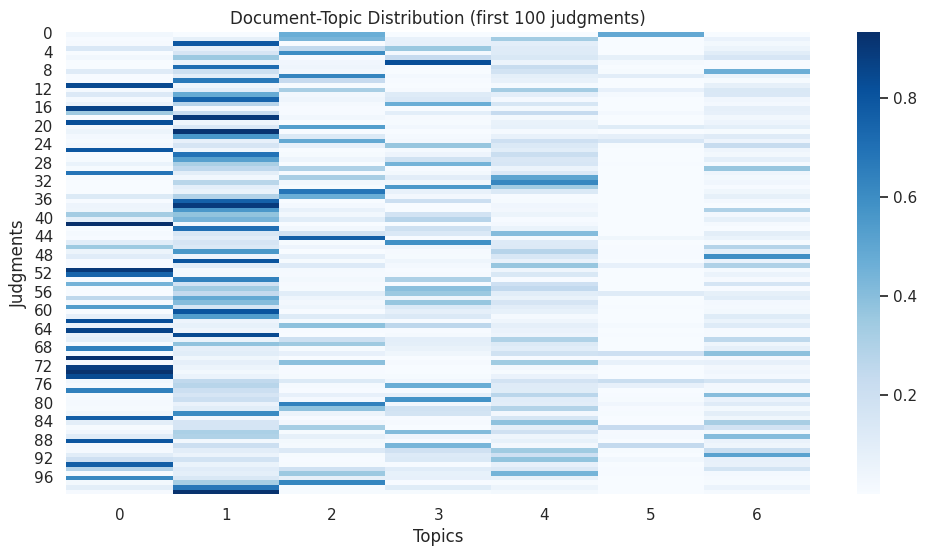

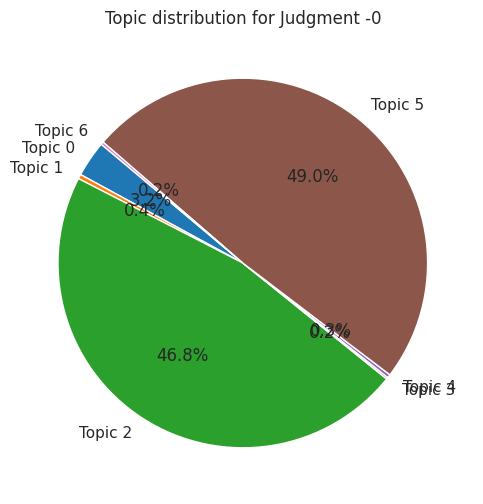

/tmp/ipython-input-216605348.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='law_category',


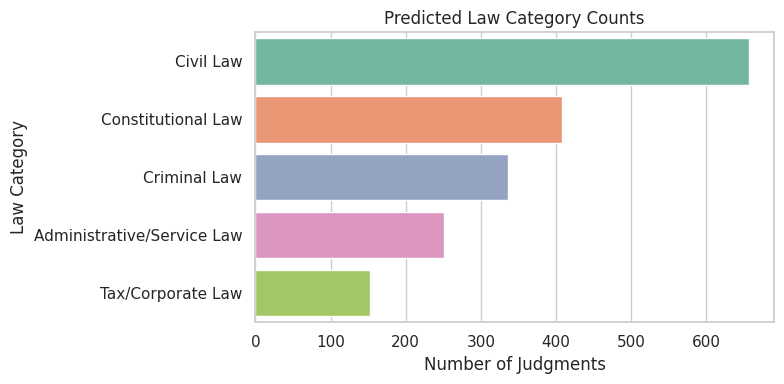

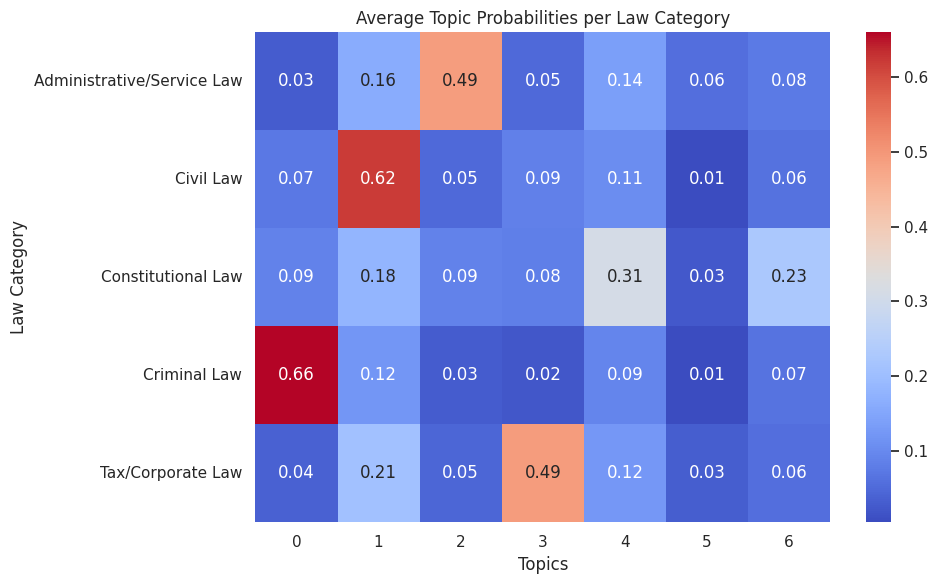

✅ All visualizations rendered inline in Colab


In [34]:
# === LDA Visualization in Colab (Fully Inline) ===

# ----------------------------
# 0. Imports & Settings
# ----------------------------
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import warnings

# Suppress warnings (optional)
warnings.filterwarnings("ignore", category=DeprecationWarning)

sns.set(style="whitegrid")

# ----------------------------
# 1. Top words per topic (barplots)
# ----------------------------
NUM_TOP_WORDS = 10

for i in range(NUM_TOPICS):
    top_words = lda_model.show_topic(i, topn=NUM_TOP_WORDS)
    words = [w for w, p in top_words]
    probs = [p for w, p in top_words]

    plt.figure(figsize=(8,4))
    sns.barplot(x=probs, y=words, palette='viridis')
    plt.title(f"Top words for Topic {i}")
    plt.xlabel("Probability")
    plt.ylabel("Words")
    plt.tight_layout()
    plt.show()

# ----------------------------
# 2. Heatmap of topic distributions (first 100 documents)
# ----------------------------
topic_cols = list(range(NUM_TOPICS))
plt.figure(figsize=(12,6))
sns.heatmap(df_judgment_topics[topic_cols].iloc[:100], cmap='Blues')
plt.title("Document-Topic Distribution (first 100 judgments)")
plt.xlabel("Topics")
plt.ylabel("Judgments")
plt.show()

# ----------------------------
# 3. Pie chart per judgment (example)
# ----------------------------
example_diary = df_judgment_topics['diary_no'].iloc[0]
topic_probs = df_judgment_topics[df_judgment_topics['diary_no']==example_diary][topic_cols].values.flatten()

plt.figure(figsize=(6,6))
plt.pie(topic_probs,
        labels=[f"Topic {i}" for i in range(NUM_TOPICS)],
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette("tab10", NUM_TOPICS))
plt.title(f"Topic distribution for Judgment {example_diary}")
plt.show()

# ----------------------------
# 4. Barplot of law category counts
# ----------------------------
plt.figure(figsize=(8,4))
sns.countplot(y='law_category',
              data=df_final,
              palette='Set2',
              order=df_final['law_category'].value_counts().index)
plt.title("Predicted Law Category Counts")
plt.xlabel("Number of Judgments")
plt.ylabel("Law Category")
plt.tight_layout()
plt.show()

# ----------------------------
# 5. Heatmap: average topic probabilities per law category
# ----------------------------
avg_topic_per_law = df_judgment_topics.copy()
avg_topic_per_law['law_category'] = df_final['law_category']
avg_topic_per_law = avg_topic_per_law.groupby('law_category')[topic_cols].mean()

plt.figure(figsize=(10,6))
sns.heatmap(avg_topic_per_law, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Average Topic Probabilities per Law Category")
plt.xlabel("Topics")
plt.ylabel("Law Category")
plt.tight_layout()
plt.show()

# ----------------------------
# 6. Interactive pyLDAvis visualization
# ----------------------------
pyLDAvis.enable_notebook()  # ensures inline rendering in Colab
vis = gensimvis.prepare(lda_model, corpus, dictionary)
vis  # renders interactive visualization inline

# ----------------------------
# Done
# ----------------------------
print("✅ All visualizations rendered inline in Colab")
